In [18]:

import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph


In [2]:
inputs = [.2,.4,.1]
weights = [.2,.5,-.5]
bias = 2 
#we have a single bias per neuron

output = inputs[0] * weights [0] + inputs[1] * weights [1] + inputs[2] * weights [2] + bias
print(output)



2.19


In [3]:
def f(x):
    return 3*x**2 + 20

In [4]:
f(30)

2720

In [7]:
xs = np.arange(-5,5.0,.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [8]:
ys = f(xs)

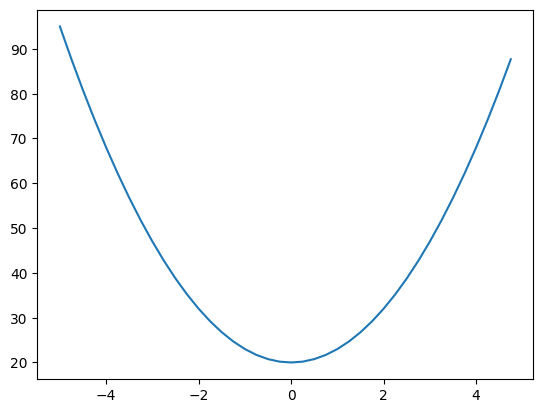

In [9]:
plt.plot(xs, ys)

In [10]:
h = .001
x = 3.0
print(f(x))
(f(x + h) - f(x))/h

47.0


18.003000000000213

In [11]:
h = .001
x = -2.0
print(f(x))
(f(x + h) - f(x))/h

32.0


-11.99699999999737

In [12]:
h = .001
x = 0.0
print(f(x))
(f(x + h) - f(x))/h

20.0


0.0029999999995311555

In [13]:
a = 2.0 
b= -3.0
c = 10.0
d = a * b + c 
print(d)

4.0


In [14]:
class Value: 
    def __init__(self, data, _children=(), _op=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    def __repr__(self): 
        return f"Value(data = {self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other), "+")
        return out 
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out 


In [19]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f  }" % (n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [16]:
a = Value(2.0)
b = Value(3.0)
c = Value(1.0)
d = a*b + c 
print(d)

Value(data = 7.0)


In [20]:
draw_dot(d)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH